In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-6, 6, 100)
activations = sigmoid(x)

def plot_func(x_tan = 0):
    plt.plot(x, activations)
    plt.title("Sigmoid Function and Gradient")
    plt.xlabel("$x$")
    plt.ylabel("sigmoid($x$)")
    plt.text(x_tan, sigmoid(x_tan), f"Gradient: {sigmoid_gradient(x_tan):.4f}")
    plt.xlim((-6,6))
    plt.ylim((-0.5,1.5))
    plt.rcParams['figure.figsize'] = [7, 5]
    y_tan = sigmoid(x_tan)  # y value
    span = 4 # line span along x axis
    data_tan = np.linspace(x_tan - span, x_tan + span)  # x values to plot
    gradient_tan = sigmoid_gradient(x_tan)     # gradient of the tangent
    tan = y_tan + gradient_tan * (data_tan - x_tan)     # y values to plot
    plt.plot(x_tan, y_tan, marker="o", color="orange", label=True)  # marker
    plt.plot(data_tan, tan, linestyle="--", color="orange")         # line
    plt.show()

In [3]:
interact(plot_func, x_tan = widgets.FloatSlider(value=0,min=-6,max=6,step=0.2))

interactive(children=(FloatSlider(value=0.0, description='x_tan', max=6.0, min=-6.0, step=0.2), Output()), _do…

<function __main__.plot_func(x_tan=0)>

### Vanishing Gradient

In [4]:
np.random.seed(12345)
t = 20
h = np.random.randn(5,t)
x = np.random.randn(5,t)

In [5]:
b_h = np.random.randn(5,1) # bias term
W_hx = np.random.randn(5,5) # W_hx

In [6]:
eig = np.random.rand(5)*4 # Random eigenvalues lower than 4
Q = np.random.randn(5,5) # Random eigenvectors stacked in matrix Q
W_hh = Q@np.diag(eig)@np.linalg.inv(Q) # W_hh

In [7]:
def prod(k):
    p = 1 
    for i in range(t-1, k-2, -1):
        p *= W_hh.T@np.diag(sigmoid_gradient(W_hh@h[:,i]+ W_hx@x[:,i] + b_h))
    return p

In [8]:
# Contribution to gradient for each value of k
product = np.zeros(20)
for k in range(t):
    product[k] = np.max(prod(k+1))

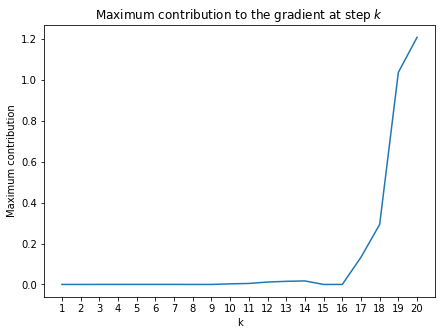

In [10]:
plt.plot(np.array(range(t))+1, product)
plt.title("Maximum contribution to the gradient at step $k$");
plt.xlabel("k");
plt.ylabel("Maximum contribution")
plt.xticks(np.array(range(t))+1)
plt.show()

### Exploding Gradient

In [12]:
eig = 4 + np.random.rand(5)*10 #Random eigenvalues greater than 4
Q = np.random.randn(5,5) #Random eigenvectors stacked in matrix Q
W_hh = Q@np.diag(eig)@np.linalg.inv(Q) #W_hh

In [13]:
# Contribution to gradient for each value of k
product = np.zeros(20)
for k in range(t):
    product[k] = np.max(prod(k+1))

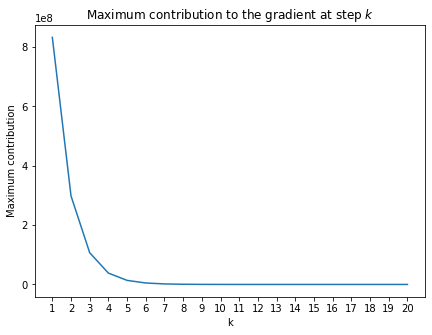

In [14]:
plt.plot(np.array(range(t))+1, product)
plt.title("Maximum contribution to the gradient at step $k$");
plt.xlabel("k");
plt.ylabel("Maximum contribution")
plt.xticks(np.array(range(t))+1)
plt.show()